# Environment Preparation

In [4]:
from utils.dataloader import DatasetLoader 
from utils.plot import plt_corr
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import xgboost as xgb
import shap
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [5]:
dataset_path = "data/dataset/"
loader = DatasetLoader(dataset_path)

datasets = loader.load_all_pickle_dataset()
dataset_dict = loader.get_state_names(datasets[0])
print(dataset_dict)

blacklist_states = ['kansas', 'new mexico', 'california', 'arizona']

for idx in range(len(blacklist_states)):
    del dataset_dict[blacklist_states[idx]]

full_df = loader.combine_datasets(datasets,dataset_dict,total_dataset_number=5)

{'alabama': ['baldwin', 'calhoun', 'cherokee', 'coffee', 'covington', 'dale', 'dallas', 'elmore', 'escambia', 'geneva', 'henry', 'houston', 'lauderdale', 'lawrence', 'limestone', 'madison', 'mobile', 'monroe', 'shelby'], 'arizona': ['graham', 'maricopa', 'pinal', 'yuma'], 'arkansas': ['ashley', 'chicot', 'clay', 'craighead', 'crittenden', 'desha', 'drew', 'jefferson', 'lee', 'lincoln', 'mississippi', 'phillips', 'poinsett'], 'california': ['kings', 'merced', 'tulare'], 'georgia': ['appling', 'atkinson', 'baker', 'ben hill', 'berrien', 'bleckley', 'brooks', 'bulloch', 'burke', 'calhoun', 'candler', 'coffee', 'colquitt', 'cook', 'crisp', 'decatur', 'dodge', 'dooly', 'early', 'emanuel', 'grady', 'irwin', 'jeff davis', 'jefferson', 'jenkins', 'laurens', 'miller', 'mitchell', 'pierce', 'pulaski', 'randolph', 'screven', 'seminole', 'sumter', 'tattnall', 'terrell', 'thomas', 'tift', 'turner', 'webster', 'wilcox', 'worth'], 'kansas': ['pratt', 'sumner'], 'louisiana': ['catahoula', 'east carrol

In [6]:
full_df.head(50)

,Date,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,04-15,0.310849,11.546470,45.162013,15083.440266,14397.592538,45896.016658,0.319848,427.239497,27.437770,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,05-15,0.328404,12.507246,44.811690,15171.300404,14576.705072,48760.840971,4.875159,387.576621,29.670406,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
2,06-15,0.186835,12.136800,44.564538,15101.516064,14620.126352,50272.138924,11.172403,310.082462,29.770382,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
3,07-15,0.337602,11.587949,40.694987,15105.019305,14636.127627,49658.408145,7.419759,328.322165,31.307629,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
4,08-15,0.429020,23.179714,66.186181,15012.753248,14827.422734,47196.632539,8.091435,349.853724,33.159170,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
5,09-15,0.475267,20.246953,63.133876,15033.691619,14584.152217,43828.883448,2.943241,404.791831,30.427653,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
6,04-15,0.336559,14.480028,50.533619,15032.168705,14410.282037,46254.087089,0.221124,445.857697,28.149444,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
7,05-15,0.373631,18.694851,54.850629,15211.355389,14562.766301,49508.886035,1.244099,450.403895,29.768192,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
8,06-15,0.379201,17.726920,50.421978,15036.464680,14673.432203,51233.509144,4.492070,379.360199,30.557649,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
9,07-15,0.465103,28.353424,67.117212,15205.223552,14696.176157,50532.337023,0.918325,425.552879,32.343371,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0


In [7]:
full_df['Date'] = pd.to_datetime(full_df['Date'], format = '%m-%d')

In [8]:
full_df.dtypes

Date                datetime64[ns]
evi                        float64
lai                        float64
fpar                       float64
lst_day                    float64
lst_nigth                  float64
dayl                       float64
prcp                       float64
srad                       float64
tmax                       float64
tmin                       float64
vp                         float64
ssm                        float64
susm                       float64
Sand                       float64
Silt                       float64
Clay                       float64
Bulk density               float64
Coarse fragments           float64
Total Nitrogen             float64
pH                         float64
CEC                        float64
SOC                        float64
OCD                        float64
OCS                        float64
yield                      float64
dtype: object

Train:  (880, 80)
Test:  (220, 80)
XGBoost Parameters:
objective: reg:squarederror
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: None
gpu_id: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: None
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: None
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
n_estimators: 100
n_jobs: None
num_parallel_tree: None
predictor: None
random_state: None
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
validate_parameters: None
verbosity: None
RMSE: 120.264287


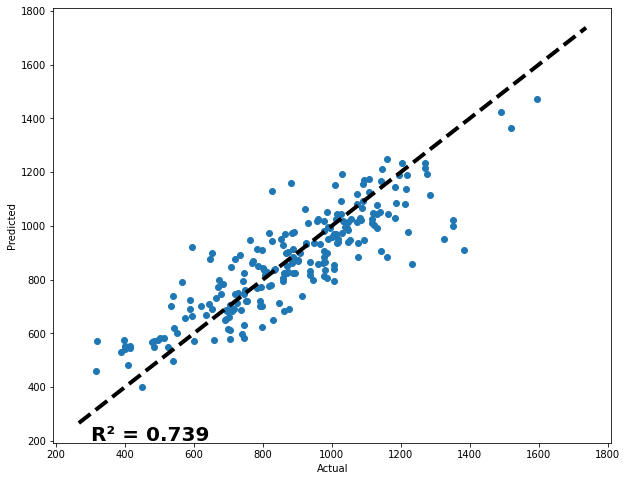

In [39]:
"""
Removing Features:
Static: OCS, Bulk density, CEC, Total Nitrogen, 
Dynamic: lst_day, lst_night, fpar, tmin, vp, lai
"""
from sklearn.preprocessing import MinMaxScaler

drop_feature_list = ['OCS', 'Bulk density', 'CEC' ,'lst_day', 'lst_nigth', 'fpar', 'tmin', 'vp', 'lai', 'Total Nitrogen']
df_dropped = full_df.drop(drop_feature_list,axis=1)

vector_df_15, _ = loader.vectorize_dataset(df_dropped)

target = 'yield'

train = vector_df_15.drop(target,axis=1).to_numpy()
test = vector_df_15[target].to_numpy()

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(train, test, test_size=0.20, random_state=34)

scaler = MinMaxScaler()
scaler.fit(X_train_full)
X_train_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)


print("Train: ", X_train_scaled.shape)
print("Test: ", X_test_scaled.shape)

# fit model no training data
xg_reg_dropped = xgb.XGBRegressor(objective ='reg:squarederror') 
xg_reg_dropped.fit(X_train_full,y_train_full) 
# plot feature importance

print("XGBoost Parameters:")
for key, value in xg_reg_dropped.get_params().items():
    print(f"{key}: {value}")

from sklearn.metrics import mean_squared_error,r2_score
pred_xgb_full = xg_reg_dropped.predict(X_test_full.reshape(X_test_full.shape[0],-1))
pred_train_xgb_full = xg_reg_dropped.predict(X_train_full.reshape(X_train_full.shape[0],-1))
rmse_xgb_full = np.sqrt(mean_squared_error(y_test_full, pred_xgb_full)) 

print("RMSE: %f" % (rmse_xgb_full)) 

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_test_full, pred_xgb_full)
ax.plot([test.min(), test.max()], [test.min(), test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line

ax.annotate("R² = {:.3f}".format(r2_score(y_test_full, pred_xgb_full)), (300, 200),fontsize=20, fontweight='bold')
#plt.savefig("/Users/alperbalmumcu/Github/pickle/Results/Case2/xgboost/r2.png")
plt.show()



In [9]:
cols = list(full_df.columns)
dynamic_cols = cols[1:14]
new_dynamic_cols = [f"{dyn}_{m}" for dyn in dynamic_cols for m in range(4, 10)]

vector_df = pd.DataFrame(columns=new_dynamic_cols)
mean_df = pd.DataFrame(columns=cols[1:])

for i in range(0, len(full_df), 6):
    row = full_df.iloc[i:i+6,1:14].values.ravel()
    vector_df = vector_df.append(pd.Series(row, index=vector_df.columns), ignore_index=True)
    mean_ = []
    for j in range(1, len(cols)):
        values = full_df.iloc[i:i+6, j].values
        mean_.append(values.mean())
    mean_df = mean_df.append(pd.Series(mean_, index=cols[1:]), ignore_index=True)

for i in range(13,len(cols)):
    vector_df[cols[i]] = mean_df[cols[i]]

In [10]:
vector_df

,evi_4,evi_5,evi_6,evi_7,evi_8,evi_9,lai_4,lai_5,lai_6,lai_7,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,0.310849,11.546470,45.162013,15083.440266,14397.592538,45896.016658,0.319848,427.239497,27.437770,15.302211,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,0.336559,14.480028,50.533619,15032.168705,14410.282037,46254.087089,0.221124,445.857697,28.149444,11.985726,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
2,0.336853,12.407548,47.921246,14997.716132,14437.036766,46295.602571,0.621514,435.435894,28.558294,12.619318,...,410.812365,293.561398,109.764601,52.214165,1067.024366,117.940081,38.610076,150.685079,41.877138,964.0
3,0.360703,13.037801,50.409106,15176.577088,14440.059104,45978.737251,0.000000,445.037145,28.957153,13.814012,...,130.701087,205.027886,59.933976,54.598065,859.944129,103.266948,21.015287,140.017393,37.409538,800.0
4,0.380783,17.901462,56.552653,15012.067384,14396.886612,45973.194882,0.043116,453.083244,28.941340,13.219074,...,159.153368,195.856186,77.696829,51.155335,969.720436,99.784046,16.696927,130.917712,36.361849,857.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.267679,8.770536,40.253526,15128.897507,14296.182710,45855.301590,0.656756,500.111425,24.327627,11.296751,...,392.798638,427.334271,267.768370,68.298912,1214.751463,152.393196,3.542135,184.377850,53.363718,1007.0
1096,0.261453,9.515699,40.070059,14765.943970,13918.144770,46427.393221,0.343266,454.650865,16.914865,2.665841,...,400.648040,303.618716,177.292773,74.770346,1014.992316,73.680604,30.698133,131.214816,38.662082,483.0
1097,0.174508,4.717369,23.711482,15505.519339,14517.192081,45558.536441,0.076448,465.490105,27.764946,17.690217,...,179.360253,270.159167,176.403242,76.559601,1005.625344,92.671008,5.454114,132.518912,30.728612,701.0
1098,0.256204,10.502363,43.657770,15018.070625,14214.546430,46010.429597,0.453012,491.050232,21.158996,7.966834,...,464.448651,404.629042,373.127370,76.310138,1036.009102,109.931562,28.895865,166.142748,44.004660,588.0


In [11]:
mean_df.head(-20)

,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,tmin,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,0.344663,15.200855,50.758881,15084.620151,14607.021090,47602.153448,5.803641,367.977717,30.295502,20.418101,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,0.392913,21.772806,59.835428,15058.382752,14604.918976,48195.141510,2.303123,401.970012,30.041473,17.615150,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
2,0.375524,17.379914,56.179904,15018.553591,14652.624353,48264.095885,2.111686,397.700982,30.121420,17.801071,...,410.812365,293.561398,109.764601,52.214165,1067.024366,117.940081,38.610076,150.685079,41.877138,964.0
3,0.383917,15.487743,52.527555,15109.090043,14561.656829,47738.877896,4.313393,382.327416,31.093999,19.026908,...,130.701087,205.027886,59.933976,54.598065,859.944129,103.266948,21.015287,140.017393,37.409538,800.0
4,0.382282,20.330832,56.534476,15016.993018,14563.336256,47729.713099,3.179764,392.646221,31.107012,18.905130,...,159.153368,195.856186,77.696829,51.155335,969.720436,99.784046,16.696927,130.917712,36.361849,857.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.219306,6.627791,30.654982,15577.320888,14665.618134,47724.548952,0.558000,454.841669,32.171979,17.607449,...,384.353143,354.576269,227.404763,75.730844,1199.753726,109.660900,129.156751,148.680180,44.048889,319.0
1076,0.305644,10.625983,42.705665,15347.027866,14678.558332,47756.214430,1.917498,413.647044,31.729351,19.142229,...,433.639717,435.625481,304.976415,75.635628,1055.350307,110.528459,21.798881,160.402462,43.588915,936.0
1077,0.316389,11.380937,43.190674,15466.493015,14656.839271,47377.767185,1.504384,437.900070,33.247304,18.902190,...,385.880326,375.340501,224.000739,75.074072,973.696969,99.163674,76.061158,148.675559,43.612618,1458.0
1078,0.343374,11.820453,46.041941,15319.123663,14664.537352,47647.357942,1.684080,420.500598,32.241109,19.498166,...,409.217175,440.237549,331.591283,72.628743,947.006644,102.589436,31.605201,153.129594,35.440909,732.0


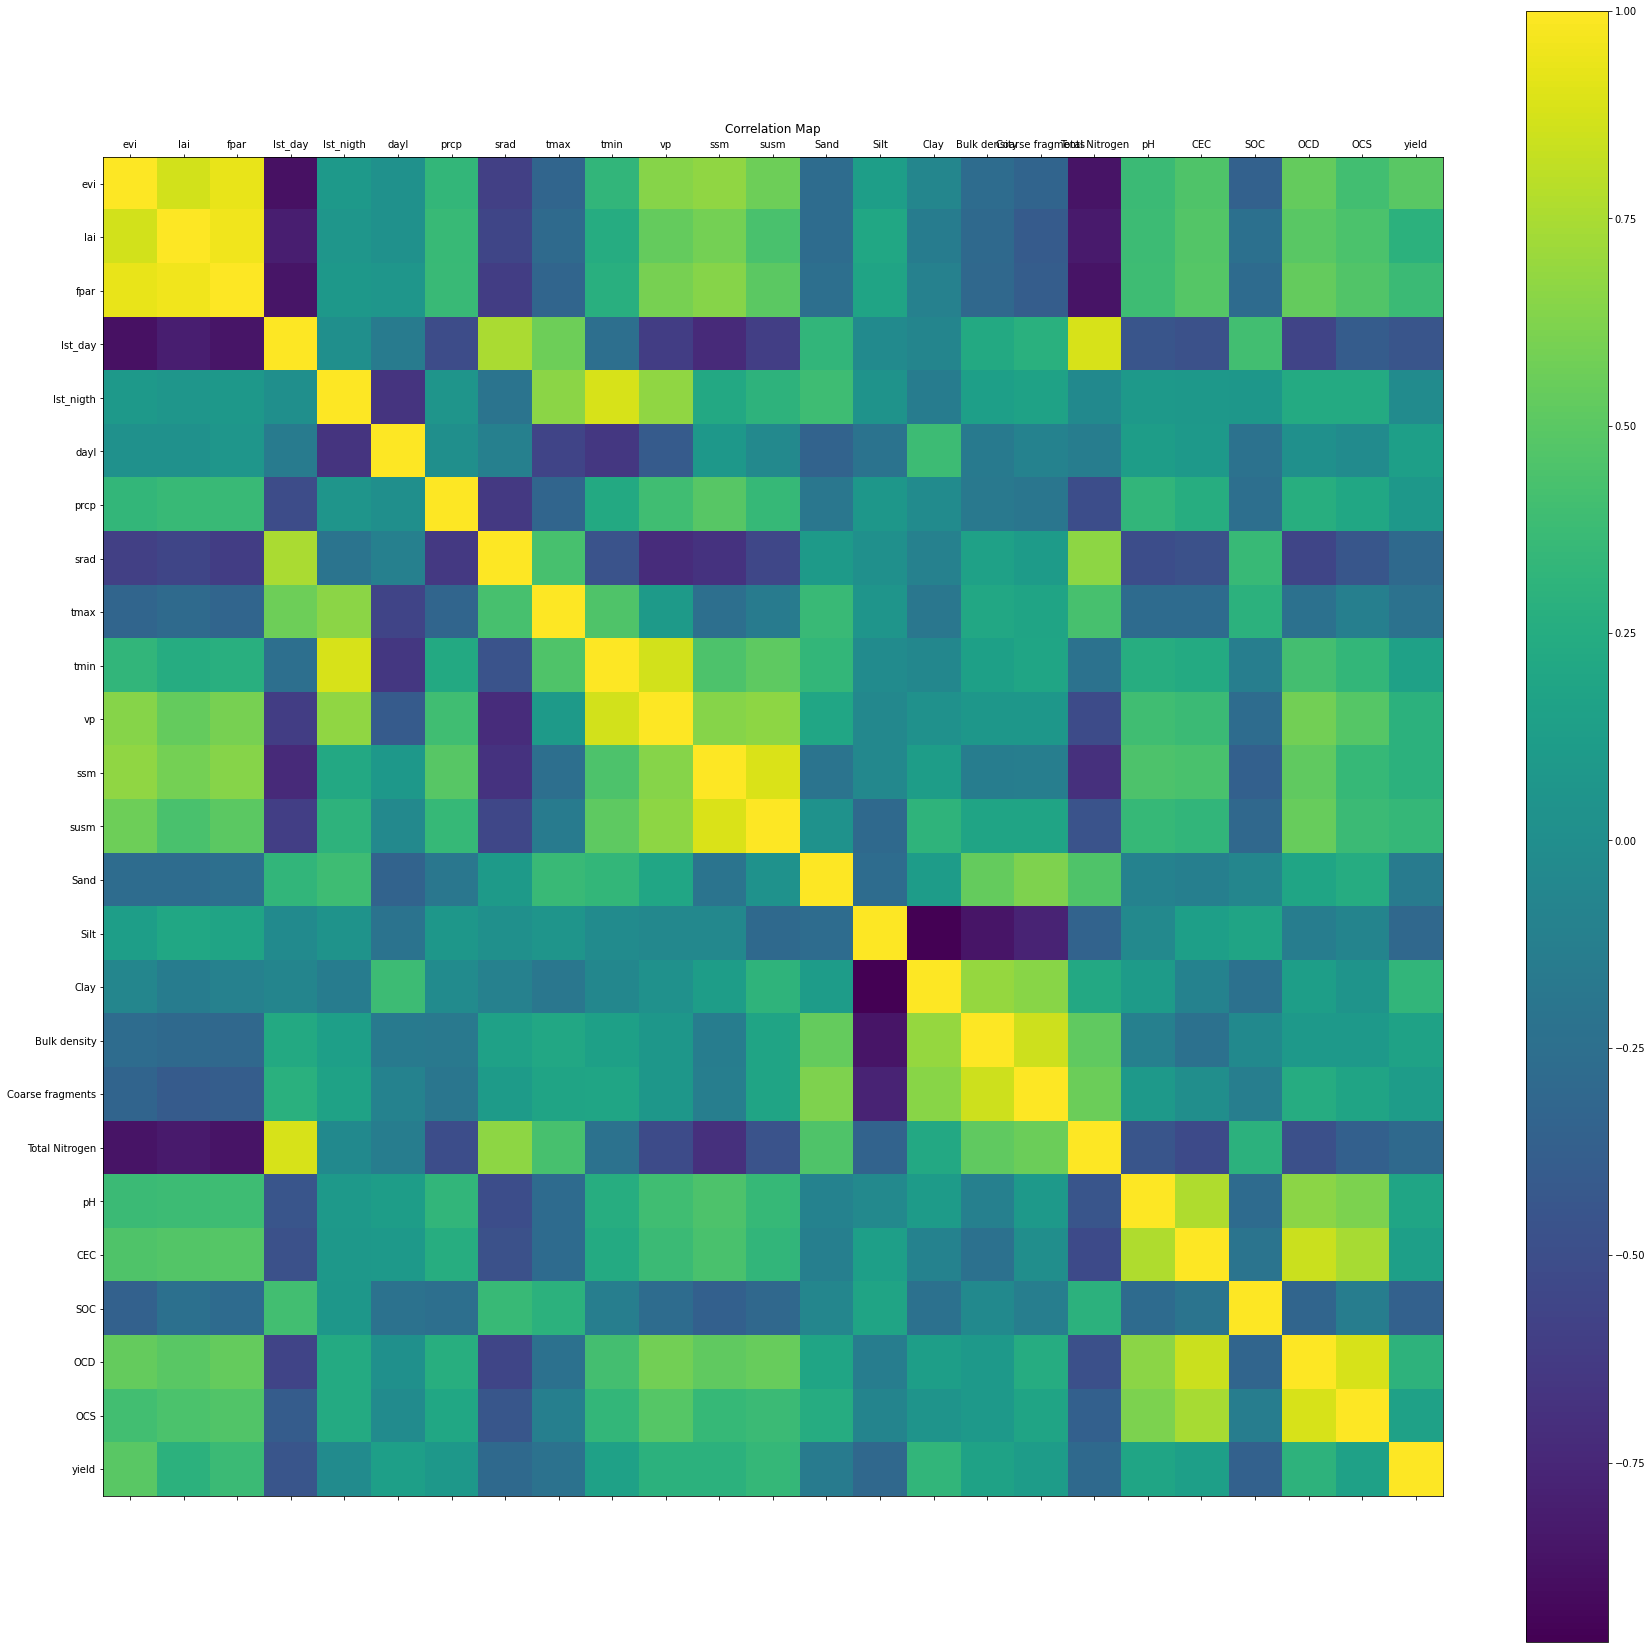

In [19]:
plt_corr(mean_df,size=(30,30),save_fig=True, save_path= "results/corr_map.png")

# Feature Importance

## XGBoost

In [12]:
target = 'yield'

#df_no_data_removed_ = full_df.drop('Date',axis=1)


X = mean_df.drop(target,axis=1).to_numpy()

y = mean_df[target].to_numpy()

#  convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 
data_dmatrix = xgb.DMatrix(data=X,label=y) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) 

# fit model no training data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror') 
xg_reg.fit(X_train,y_train) 
# plot feature importance


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

RMSE: 126.468888


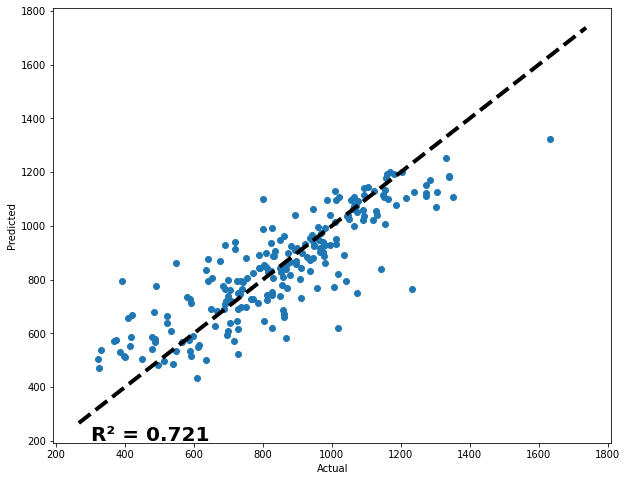

In [13]:

from sklearn.metrics import mean_squared_error,r2_score
pred_xgb_full = xg_reg.predict(X_test.reshape(X_test.shape[0],-1))
pred_train_xgb_full = xg_reg.predict(X_train.reshape(X_train.shape[0],-1))
rmse_xgb_full = np.sqrt(mean_squared_error(y_test, pred_xgb_full)) 

print("RMSE: %f" % (rmse_xgb_full)) 

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_test, pred_xgb_full)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line

ax.annotate("R² = {:.3f}".format(r2_score(y_test, pred_xgb_full)), (300, 200),fontsize=20, fontweight='bold')
#plt.savefig("/Users/alperbalmumcu/Github/pickle/Results/Case2/xgboost/r2.png")
plt.show()



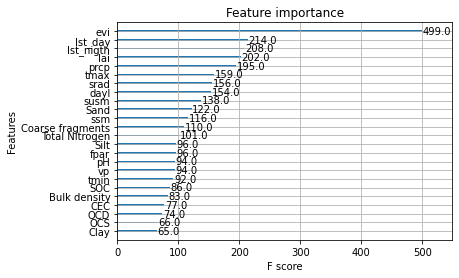

In [12]:
xgb.plot_importance(xg_reg) 
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

In [13]:
print(xg_reg.feature_importances_)

[0.10409699 0.01096714 0.01776286 0.0149766  0.01621502 0.04326583
 0.02830324 0.02539697 0.03462936 0.01862274 0.01939198 0.0303542
 0.02307961 0.08203381 0.02423344 0.13407457 0.01872206 0.10179254
 0.03185055 0.06337832 0.02399697 0.09425222 0.02512318 0.01347978]


<BarContainer object of 24 artists>

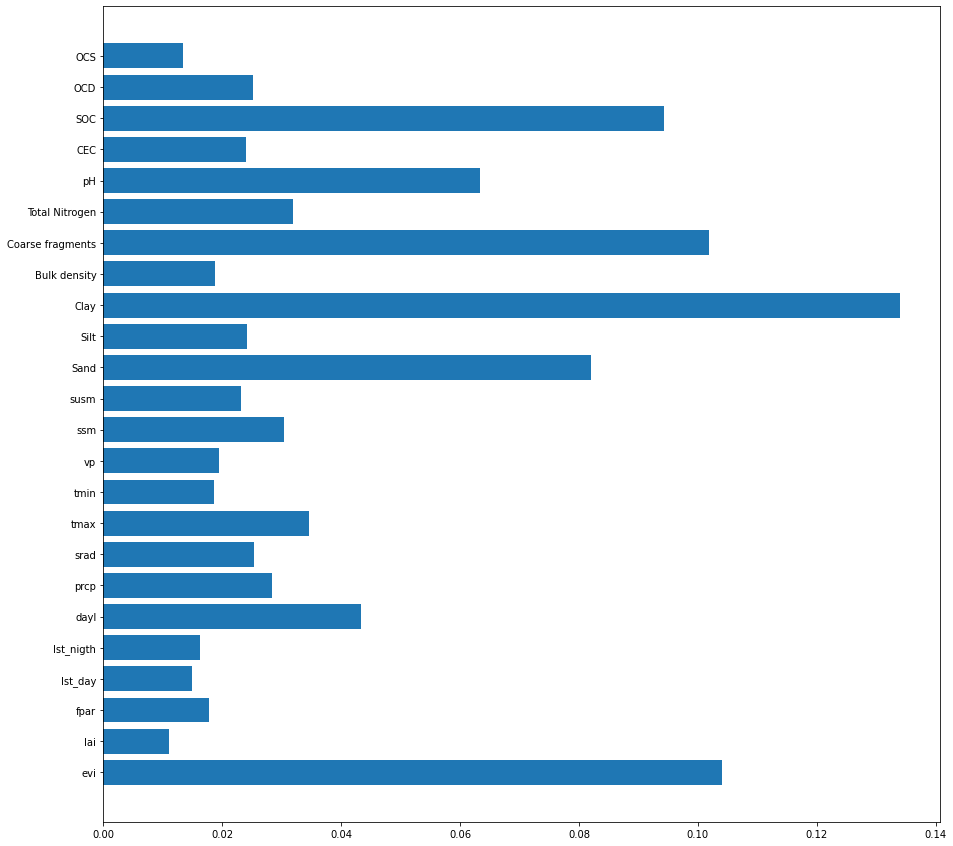

In [14]:
plt.barh(mean_df.columns[:-1], xg_reg.feature_importances_)


Text(0.5, 0, 'Xgboost Feature Importance')

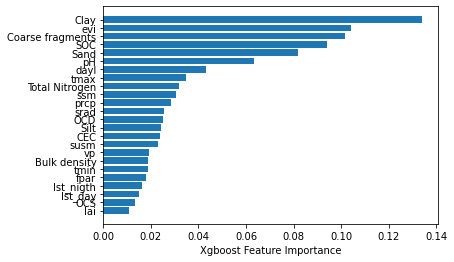

In [43]:
sorted_idx = xg_reg.feature_importances_.argsort()
plt.barh(mean_df.columns[:-1][sorted_idx], xg_reg.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [47]:
mean_df.columns[:-1][sorted_idx]

Index(['lai', 'OCS', 'lst_day', 'lst_nigth', 'fpar', 'tmin', 'Bulk density',
       'vp', 'susm', 'CEC', 'Silt', 'OCD', 'srad', 'prcp', 'ssm',
       'Total Nitrogen', 'tmax', 'dayl', 'pH', 'Sand', 'SOC',
       'Coarse fragments', 'evi', 'Clay'],
      dtype='object')

## SHAP

In [14]:
# Fits the explainer

X_df = mean_df.drop(target,axis=1)

y_df = mean_df[target]

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=41) 

explainer = shap.TreeExplainer(xg_reg)
# Calculates the SHAP values - It takes some time
_shap_values = explainer.shap_values(X_test_df)


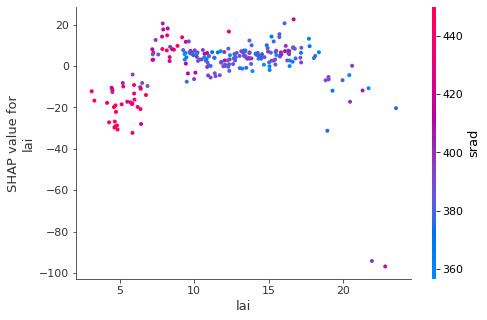

In [84]:
shap.dependence_plot(1, _shap_values, X_test_df)


In [109]:
X_test_df.columns

Index(['evi', 'lai', 'fpar', 'lst_day', 'lst_nigth', 'dayl', 'prcp', 'srad',
       'tmax', 'tmin', 'vp', 'ssm', 'susm', 'Sand', 'Silt', 'Clay',
       'Bulk density', 'Coarse fragments', 'Total Nitrogen', 'pH', 'CEC',
       'SOC', 'OCD', 'OCS'],
      dtype='object')

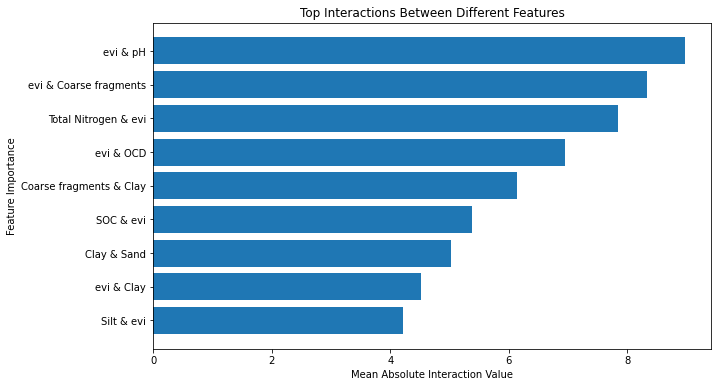

In [108]:

# Calculate SHAP interaction values
shap_interaction_values = explainer.shap_interaction_values(X_test_df)

# Calculate the mean absolute interaction values for each feature pair
mean_interaction_values = abs(shap_interaction_values).mean(0)
# Mask the diagonal (intra-feature interactions)

masked_interaction_values = np.ma.masked_where(np.eye(mean_interaction_values.shape[0]), mean_interaction_values)

# Extract the indices of the top 6 interactions between different features
top_interactions = np.unravel_index(np.argsort(masked_interaction_values, axis=None)[::-1], mean_interaction_values.shape)
top_interactions = list(zip(top_interactions[0], top_interactions[1]))
top_interactions = [pair for pair in top_interactions if pair[0] != pair[1]][:18]

# Get the feature names (replace these with your actual feature names)
feature_names = X_test_df.columns

# Extract feature names for the top 6 interactions
top_interactions_names = [f"{feature_names[i]} & {feature_names[j]}" for i, j in top_interactions][::-1]

# Get the corresponding importance values for the top 6 interactions
top_values = [mean_interaction_values[i, j] for i, j in top_interactions][::-1]

# Create a bar plot for the top 6 interactions between different features
plt.figure(figsize=(10, 6))
plt.barh(top_interactions_names[1::2], top_values[1::2])
plt.xlabel('Mean Absolute Interaction Value')
plt.ylabel('Feature Importance')
plt.title('Top Interactions Between Different Features')
plt.show()


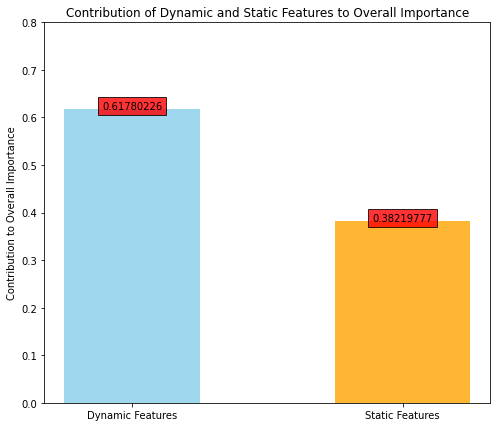

Dynamic Feature Importance: 0.6178022623062134
Static Feature Importance: 0.382197767496109


In [133]:

# Calculate SHAP values for dynamic and static features
shap_values_dynamic = _shap_values[:, :13]
shap_values_static = _shap_values[:, 13:]

# Calculate mean absolute SHAP values for dynamic and static features
mean_shap_dynamic = np.mean(np.abs(shap_values_dynamic), axis=0)
mean_shap_static = np.mean(np.abs(shap_values_static), axis=0)

# Calculate SHAP interaction values for all features
shap_interaction_values_all = explainer.shap_interaction_values(X_test_df)

# Calculate the mean absolute interaction values for each feature pair
mean_interaction_values = np.mean(np.abs(shap_interaction_values_all), axis=0)

# Calculate the contributions of dynamic and static features to the overall importance
total_importance = np.sum(mean_shap_dynamic) + np.sum(mean_shap_static)
dynamic_contribution = np.sum(mean_shap_dynamic) / total_importance
static_contribution = np.sum(mean_shap_static) / total_importance

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',bbox = dict(facecolor = 'red', alpha =.8))

# Create a bar plot to show the contributions of dynamic and static features
plt.figure(figsize=(8,7))
plt.bar('Dynamic Features', dynamic_contribution, width=0.5 ,color='skyblue', alpha=0.8)
plt.bar('Static Features', static_contribution,width=0.5, color='orange', alpha=0.8)
addlabels(['Dynamic Features','Static Features'],[dynamic_contribution,static_contribution])
plt.ylabel('Contribution to Overall Importance')
plt.title('Contribution of Dynamic and Static Features to Overall Importance')
plt.ylim([0, 0.8])
plt.show()

print(f"Dynamic Feature Importance: {dynamic_contribution}")
print(f"Static Feature Importance: {static_contribution}")

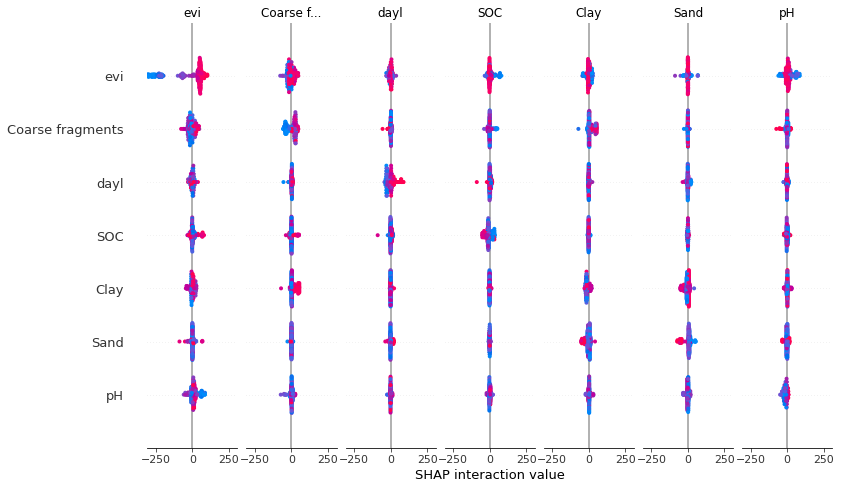

In [87]:
shap.summary_plot(explainer.shap_interaction_values(X_test_df), X_test_df, plot_type='interaction')


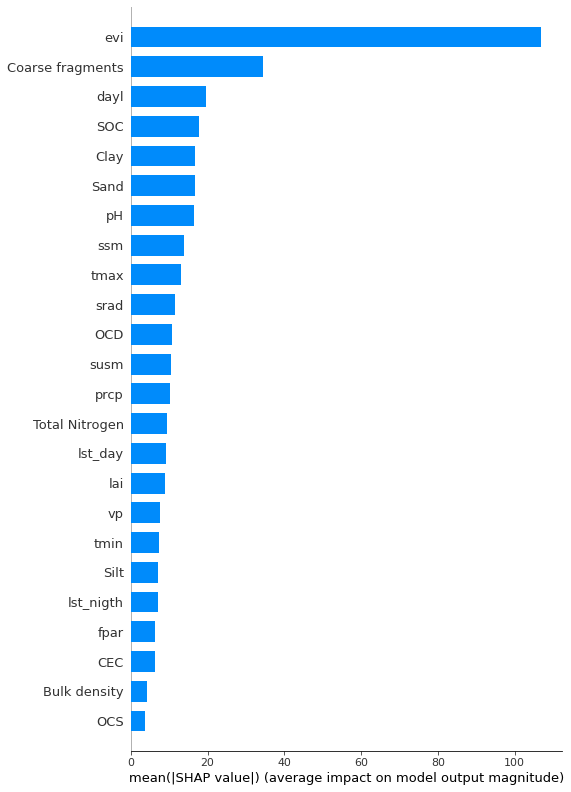

In [15]:
shap.summary_plot(_shap_values, X_test_df, plot_type="bar",max_display=30)


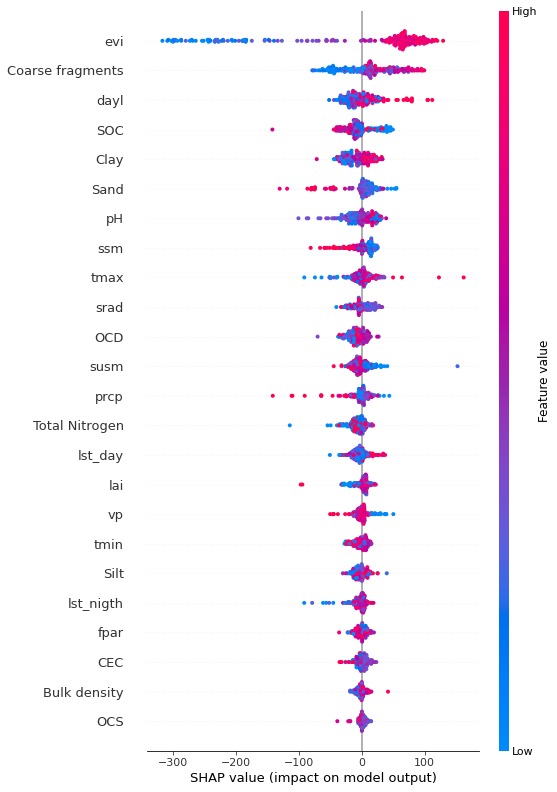

In [57]:
shap.summary_plot(_shap_values, X_test_df,max_display=30)

In [16]:
feature_names = X_train_df.columns
vals = np.abs(_shap_values).mean(0)

rf_resultX = pd.DataFrame(_shap_values, columns = X_df.columns)

vals = np.abs(rf_resultX).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance.head(25)

,col_name,feature_importance_vals
0,evi,106.876541
17,Coarse fragments,34.455246
5,dayl,19.469927
21,SOC,17.667404
15,Clay,16.810314
13,Sand,16.723413
19,pH,16.356535
11,ssm,13.823062
8,tmax,13.104445
7,srad,11.393207


In [18]:
shap_importance['col_name'].to_list()

['evi',
 'Coarse fragments',
 'dayl',
 'SOC',
 'Clay',
 'Sand',
 'pH',
 'ssm',
 'tmax',
 'srad',
 'OCD',
 'susm',
 'prcp',
 'Total Nitrogen',
 'lst_day',
 'lai',
 'vp',
 'tmin',
 'Silt',
 'lst_nigth',
 'fpar',
 'CEC',
 'Bulk density',
 'OCS']

In [49]:
shap_importance

[0.125,
 0.045,
 0.06,
 0.07,
 0.03,
 0.09,
 0.08,
 0.06,
 0.1,
 0.12,
 0.11,
 0.07,
 0.05,
 0.06,
 0.08,
 0.07,
 0.09,
 0.1,
 0.11,
 0.13,
 0.14,
 0.13,
 0.12,
 0.14]

## Permutation method


In [22]:
perm_importance = permutation_importance(xg_reg, X_test, y_test)


Text(0.5, 0, 'Permutation Importance')

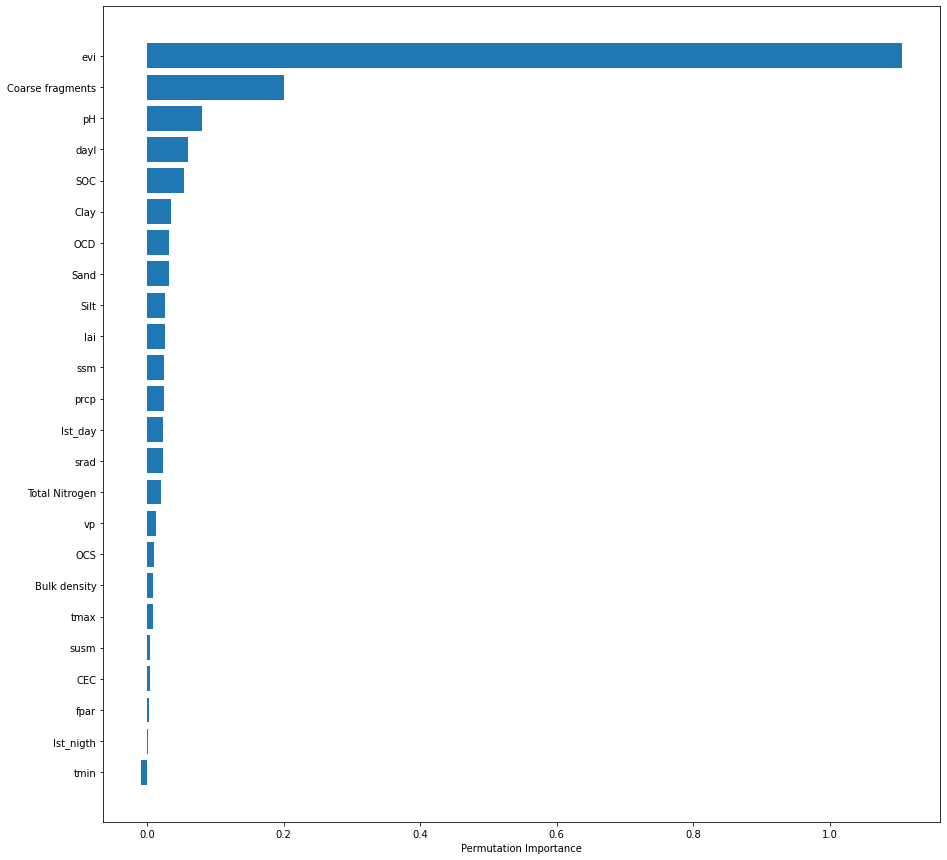

In [23]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(mean_df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

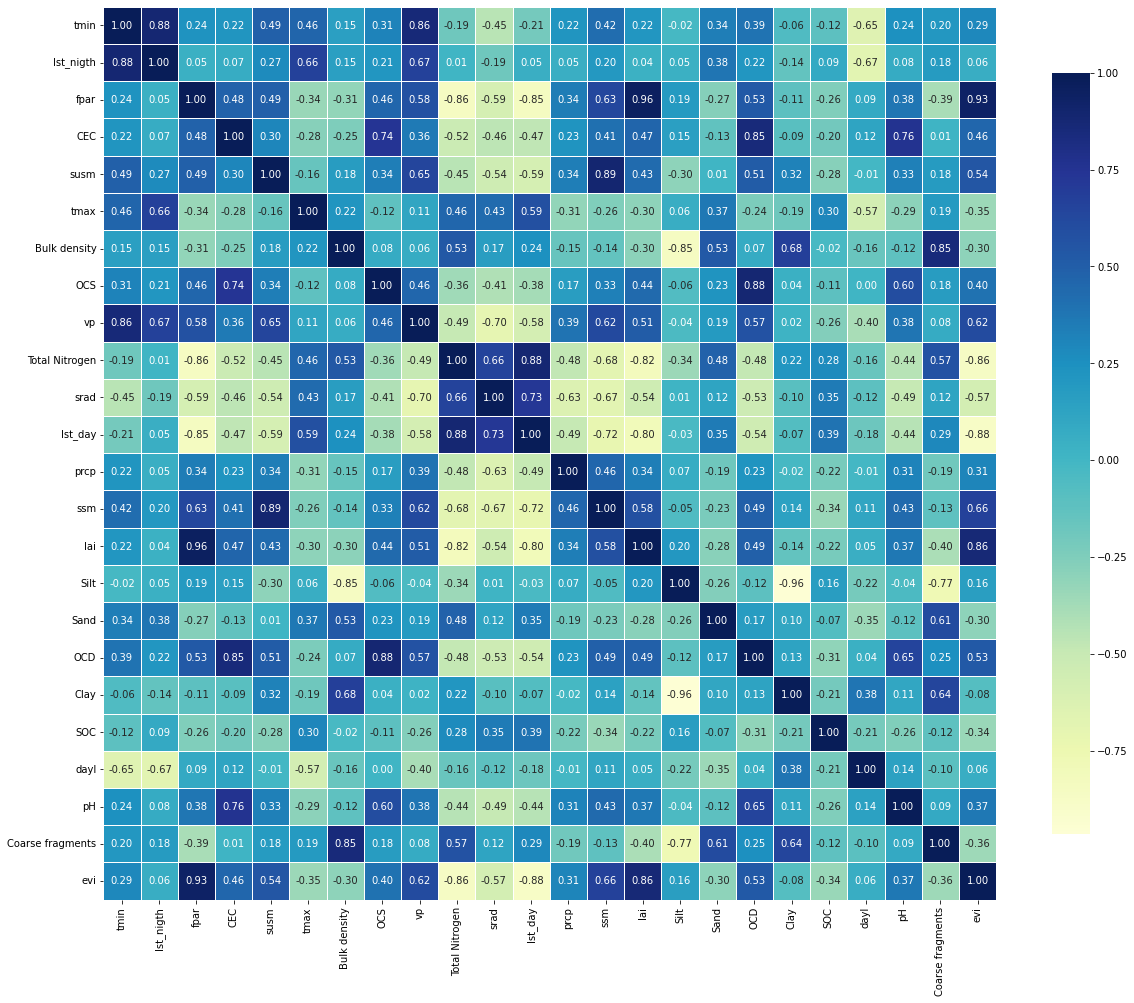

In [24]:
import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    _, _ = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[mean_df.columns[sorted_idx]])

# Feature Importance Comparation 

In [56]:
# Define the feature names
xgb_feature_names = [
    'lai', 'OCS', 'lst_day', 'lst_nigth', 'fpar', 'tmin', 'Bulk density',
    'vp', 'susm', 'CEC', 'Silt', 'OCD', 'srad', 'prcp', 'ssm',
    'Total Nitrogen', 'tmax', 'dayl', 'pH', 'Sand', 'SOC',
    'Coarse fragments', 'evi', 'Clay'
]
shap_feature_names = shap_importance['col_name'].to_list()
# Combine both XGBoost and SHAP feature importances into a single list
xgboost_importance_val = xg_reg.feature_importances_
shap_importance_val = shap_importance['feature_importance_vals'].values

array([0.10409699, 0.01096714, 0.01776286, 0.0149766 , 0.01621502,
       0.04326583, 0.02830324, 0.02539697, 0.03462936, 0.01862274,
       0.01939198, 0.0303542 , 0.02307961, 0.08203381, 0.02423344,
       0.13407457, 0.01872206, 0.10179254, 0.03185055, 0.06337832,
       0.02399697, 0.09425222, 0.02512318, 0.01347978], dtype=float32)

In [48]:
xgb_sorted_fnames = []
xgb_sorted_val = []
for (shp_feature, shp_val) in zip(shap_feature_names,shap_importance_val):
    for (xgb_feature, xgb_val) in zip(xgb_feature_names,xgboost_importance_val):
        if xgb_feature == shp_feature:
            xgb_sorted_fnames.append(xgb_feature)
            xgb_sorted_val.append(xgb_val)


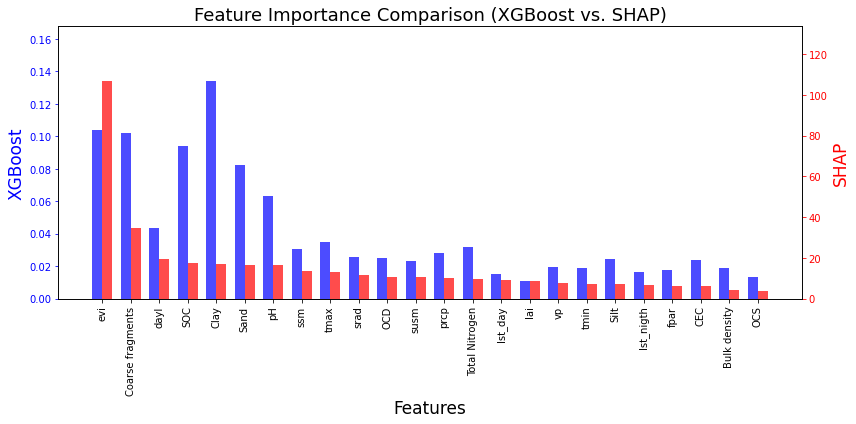

In [81]:
# Create an index array for the feature names
index = np.arange(len(shap_feature_names))

# Set the width of the bars
bar_width = 0.35

# Create subplots
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

ax1.set_ylabel('XGBoost', fontsize=18)
ax1.set_xlabel('Features', fontsize=20)
ax2.set_ylabel('SHAP', fontsize=18)

ax1.title.set_fontsize(18)
ax2.title.set_fontsize(18)

ax1.xaxis.label.set_fontsize(17)
ax1.yaxis.label.set_fontsize(17)
ax2.yaxis.label.set_fontsize(17)


# Plot the XGBoost feature importances
bar1 = ax1.bar(index, xgb_sorted_val, bar_width, label='XGBoost',color='blue', alpha=0.7)


# Plot the SHAP feature importances
bar2 = ax2.bar(index + bar_width, shap_importance_val, bar_width,color='red', label='SHAP', alpha=0.7)


# Set the x-axis labels
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(shap_feature_names, rotation=90)

# Set labels and title

ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
ax1.tick_params(axis='y', colors='blue')
ax1.set_ylim([0, max(xgb_sorted_val)+ max(xgb_sorted_val)*.25])
ax2.set_ylim([0, max(shap_importance_val)+ max(shap_importance_val)*.25])

# Add a legend
ax.legend()
plt.title('Feature Importance Comparison (XGBoost vs. SHAP)', fontsize=18)

# Display the plot
plt.tight_layout()
plt.savefig("/Users/alperbalmumcu/Github/crop-yield-estimation/results/feature_importance/xgb_vs_shap.png")
plt.show()


In [ ]:
ax1.set_ylabel('EVI', fontsize=16)
#ax1.set_title('Plot and Bar Chart')

ax1.title.set_fontsize(18)
ax1.xaxis.label.set_fontsize(12)
ax1.yaxis.label.set_fontsize(12)


# Create the bar chart
ax2 = ax1.twinx()
ax2.bar(range(len(mean_abs_shap_centered)), mean_abs_shap_centered, color='orange', alpha=0.7, width=0.4)
ax2.yaxis.label.set_color('orange')
ax1.xaxis.label.set_fontsize(15)
ax2.tick_params(axis='y', colors='orange')

ax1.yaxis.label.set_color('green')
ax1.tick_params(axis='y', colors='green')


plot_ylim = ax1.get_ylim()
bar_ylim = ax2.get_ylim()
y_min = min(plot_ylim[0], bar_ylim[0])
y_max = max(plot_ylim[1], bar_ylim[1])
ax1.set_ylim([0, 0.8])
ax2.set_ylim([-y_max, y_max])



# Set the y-axis label for the bar chart
ax2.set_ylabel('Attribution')

# Add a legend
ax2.legend(['SHAP'], loc='upper right')
plt.title("EVI").set_fontsize(18)